**IMPORT** **LIBRARIES**



In [1]:
import pandas as pd
import numpy as np

In [2]:
#load data set
data = pd.read_csv("beer-servings.csv")

** Understanding Data **

In [3]:
data.head() #first five rows

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [4]:
data.info() #summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    193 non-null    int64  
 1   country                       193 non-null    object 
 2   beer_servings                 185 non-null    float64
 3   spirit_servings               185 non-null    float64
 4   wine_servings                 187 non-null    float64
 5   total_litres_of_pure_alcohol  192 non-null    float64
 6   continent                     193 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 10.7+ KB


In [6]:
data.shape #number of coloumns & rows

(193, 7)

In [7]:
data.describe() #decribe the data such as count, mean , std etc

,Unnamed: 0,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,185.000000,185.000000,187.000000,192.000000
mean,96.000000,105.124324,83.221622,50.165775,4.741667
std,55.858452,100.524714,89.142958,80.358868,3.767654
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,20.000000,4.000000,1.000000,1.300000
50%,96.000000,76.000000,60.000000,9.000000,4.250000
75%,144.000000,185.000000,132.000000,60.500000,7.200000
max,192.000000,376.000000,438.000000,370.000000,14.400000


In [8]:
#data.describe() doesn't include catogorical values so
data.describe(include="all") #includes catogorical values

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
count,193.000000,193,185.000000,185.000000,187.000000,192.000000,193
unique,NaN,193,NaN,NaN,NaN,NaN,6
top,NaN,Afghanistan,NaN,NaN,NaN,NaN,Africa
freq,NaN,1,NaN,NaN,NaN,NaN,53
mean,96.000000,NaN,105.124324,83.221622,50.165775,4.741667,NaN
std,55.858452,NaN,100.524714,89.142958,80.358868,3.767654,NaN
min,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,48.000000,NaN,20.000000,4.000000,1.000000,1.300000,NaN
50%,96.000000,NaN,76.000000,60.000000,9.000000,4.250000,NaN
75%,144.000000,NaN,185.000000,132.000000,60.500000,7.200000,NaN


**Data cleaning**

In [9]:
#handling missing values
# beacuse the difference in the total coloumn number
data.isnull().sum()

,0
Unnamed: 0,0
country,0
beer_servings,8
spirit_servings,8
wine_servings,6
total_litres_of_pure_alcohol,1
continent,0


<Axes: >

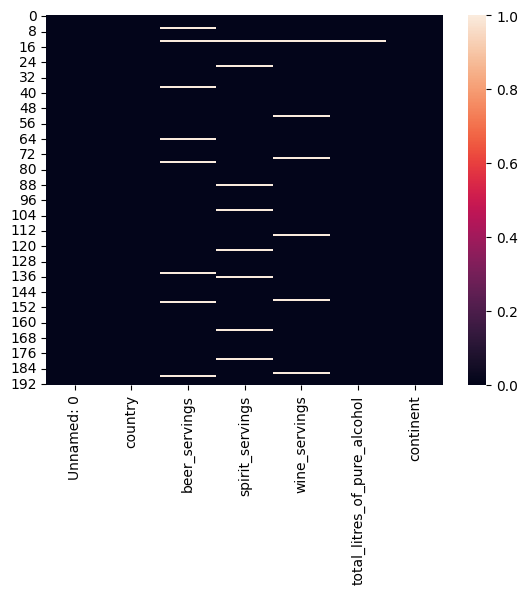

In [10]:
#filling missing values
import seaborn as sns
sns.heatmap(data.isna())

In [11]:
#splitting the data into numerical data & catogorical data
num_data = data.select_dtypes(include="number")
cat_data = data.select_dtypes(include="object")

In [13]:
for col in num_data.columns:
  num_data[col] = num_data[col].fillna(num_data[col].mean())

In [14]:
num_data.isna().sum()

,0
Unnamed: 0,0
beer_servings,0
spirit_servings,0
wine_servings,0
total_litres_of_pure_alcohol,0


In [15]:
data = pd.concat([num_data,cat_data], axis=1)

In [16]:
data.isna().sum()

,0
Unnamed: 0,0
beer_servings,0
spirit_servings,0
wine_servings,0
total_litres_of_pure_alcohol,0
country,0
continent,0


In [17]:
data.isnull().sum()

,0
Unnamed: 0,0
beer_servings,0
spirit_servings,0
wine_servings,0
total_litres_of_pure_alcohol,0
country,0
continent,0


In [18]:
data.duplicated().sum()

np.int64(0)

In [20]:
Q1 = data["beer_servings"].quantile(0.25)
Q3 = data["beer_servings"].quantile(0.75)
IQR = Q3 - Q1
IQR = data[(data["beer_servings"]>= Q1 - 1.5*IQR) & (data["beer_servings"] <= Q3 + 1.5*IQR)]

In [21]:
IQR

,Unnamed: 0,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,country,continent
0,0,0.000000,0.0,0.0,0.0,Afghanistan,Asia
1,1,89.000000,132.0,54.0,4.9,Albania,Europe
2,2,25.000000,0.0,14.0,0.7,Algeria,Africa
3,3,245.000000,138.0,312.0,12.4,Andorra,Europe
4,4,217.000000,57.0,45.0,5.9,Angola,Africa
...,...,...,...,...,...,...,...
188,188,105.124324,100.0,3.0,7.7,Venezuela,South America
189,189,111.000000,2.0,1.0,2.0,Vietnam,Asia
190,190,6.000000,0.0,0.0,0.1,Yemen,Asia
191,191,32.000000,19.0,4.0,2.5,Zambia,Africa


DATA INTEGRATION
alread concatinated
can also use pd.merge

DATA TRANSFORMATION

**Encoding**

In [25]:
#convert catogorical data into numerical data
#encoding
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to the categorical columns in cat_data
for col in cat_data.columns:
    cat_data[col] = LabelEncoder().fit_transform(cat_data[col])

# Concatenate the numerical and encoded categorical data back into the original data DataFrame
data = pd.concat([num_data, cat_data], axis=1)

In [28]:
from sklearn.preprocessing import OneHotEncoder
# Apply one-hot encoding to the categorical data
cat_data_encoded = pd.get_dummies(cat_data)

# Concatenate the numerical data and the one-hot encoded categorical data
data = pd.concat([num_data, cat_data_encoded], axis=1)

**Scaling**

In [30]:
from sklearn.preprocessing import StandardScaler
data[num_data.columns]= StandardScaler().fit_transform(data[num_data.columns])

In [31]:
from sklearn.preprocessing import MinMaxScaler
data[num_data.columns]= MinMaxScaler().fit_transform(data[num_data.columns])

**Data Reduction**

In [39]:
X = data[["beer_servings","spirit_servings","wine_servings",'total_litres_of_pure_alcohol']]

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.72603972 0.15567346]


In [41]:
y = data['total_litres_of_pure_alcohol']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)